# Modelo Predictivo

### Import

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import StandardScaler

import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

mpl.rcParams['figure.figsize'] = (18, 16)
mpl.rcParams['axes.grid'] = False

### Parameters

In [2]:
EPOCHS=40
PASOS=7

### Load data

#### DataFrame

ARCHIVOS DE DATOS POR ESTACION (DESDE 05-2013). COLUMNAS Y UNIDADES
- Columna 1 : Identificador Estación 
- Columna 2 : Fecha 
- Columna 3 : Temperatura Máxima (ºC)
- Columna 4 : Hora Temperatura Máxima 
- Columna 5 : Temperatura mínima (ºC)
- Columna 6 : Hora Temperatura mínima 
- Columna 7 : Temperatura Media (ºC)
- Columna 8 : Racha máxima de viento (Km/h)
- Columna 9 : Hora de Racha Máxima 
- Columna 10 : Velocidad media de Viento (Km/h)
- Columna 11 : Hora de Velocidad Máxima de viento 
- Columna 12 : Precipitacion Total diaria (mm)
- Columna 13 : Precipitacion de 0 a 6 horas (mm)
- Columna 14 : Precipitacion de 6 a 12 horas (mm)
- Columna 15 : Precipitacion de 12 a 18 horas (mm)
- Columna 16 : Precipitacion de 18 a 24 horas (mm)

In [75]:
station = "0016A"
file = f'../data/DatosEstaciones - 2020-08/{station}.csv'

df = pd.read_csv(file, sep=";", index_col=1)
df

,Id,Tmax,HTmax,Tmin,HTmin,Tmed,Racha,HRacha,Vmax,HVmax,TPrec,Prec1,Prec2,Prec3,Prec4
Fecha,,,,,,,,,,,,,,,
2013-05-07,0016A,27.5,14:50,13.5,03:40,20.5,42.0,14:00,31.0,14:00,0.0,0.0,0.0,0.0,0.0
2013-05-08,0016A,25.5,14:50,15.0,05:50,20.3,33.0,16:00,22.0,15:50,0.0,0.0,0.0,0.0,0.0
2013-05-09,0016A,22.3,14:00,14.8,05:30,18.5,24.0,22:40,17.0,22:40,0.2,0.0,0.0,0.0,0.2
2013-05-10,0016A,25.3,17:30,13.8,06:20,19.5,42.0,04:20,35.0,14:40,0.0,0.0,0.0,0.0,0.0
2013-05-11,0016A,24.1,15:00,13.3,07:10,18.7,45.0,14:10,29.0,14:10,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,0016A,31.9,14:00,22.3,06:50,27.1,24.0,15:20,15.0,15:50,0.0,0.0,0.0,0.0,0.0
2020-08-28,0016A,31.8,15:20,21.9,23:50,26.8,28.0,11:40,19.0,15:50,26.3,0.0,0.0,0.0,26.3
2020-08-29,0016A,26.3,14:20,17.0,23:59,21.6,35.0,11:00,26.0,10:30,18.8,18.0,0.0,0.8,0.0


In [3]:

df = df.drop(["Id"], axis=1)

df.index = pd.to_datetime(df.index)
df['weekday']=[x.weekday() for x in df.index]
df['month']=[x.month for x in df.index]
df['day']=[x.day for x in df.index]
# df = df.drop(["Fecha"], axis=1)

df["HTmax"] = pd.to_datetime(df.HTmax)
df['HTmax_hour']=[x.hour for x in df.HTmax]
df['HTmax_min']=[x.minute for x in df.HTmax]
df = df.drop(["HTmax"], axis=1)

df["HTmin"] = pd.to_datetime(df.HTmin)
df['HTmin_hour']=[x.hour for x in df.HTmin]
df['HTmin_min']=[x.minute for x in df.HTmin]
df = df.drop(["HTmin"], axis=1)

df["HRacha"] = pd.to_datetime(df.HRacha)
df['HRacha_hour']=[x.hour for x in df.HRacha]
df['HRacha_min']=[x.minute for x in df.HRacha]
df = df.drop(["HRacha"], axis=1)

df["HVmax"] = pd.to_datetime(df.HVmax)
df['HVmax_hour']=[x.hour for x in df.HVmax]
df['HVmax_min']=[x.minute for x in df.HVmax]
df = df.drop(["HVmax"], axis=1)

timestamp_s = df.index.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

df.T


Fecha,2013-05-07,2013-05-08,2013-05-09,2013-05-10,2013-05-11,2013-05-12,2013-05-13,2013-05-14,2013-05-15,2013-05-16,...,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31
Tmax,27.500000,25.500000,22.300000,25.300000,24.100000,24.400000,21.500000,18.900000,19.100000,20.300000,...,32.600000,32.700000,32.400000,33.000000,32.200000,31.900000,31.800000,26.300000,28.400000,28.400000
Tmin,13.500000,15.000000,14.800000,13.800000,13.300000,12.200000,10.600000,15.100000,11.600000,9.800000,...,22.400000,22.300000,18.900000,21.700000,23.200000,22.300000,21.900000,17.000000,15.100000,15.100000
Tmed,20.500000,20.300000,18.500000,19.500000,18.700000,18.300000,16.100000,17.000000,15.400000,15.000000,...,27.500000,27.500000,25.700000,27.400000,27.700000,27.100000,26.800000,21.600000,21.800000,21.800000
Racha,42.000000,33.000000,24.000000,42.000000,45.000000,48.000000,30.000000,22.000000,35.000000,45.000000,...,32.000000,39.000000,46.000000,33.000000,30.000000,24.000000,28.000000,35.000000,46.000000,42.000000
Vmax,31.000000,22.000000,17.000000,35.000000,29.000000,32.000000,19.000000,13.000000,22.000000,31.000000,...,20.000000,28.000000,33.000000,24.000000,15.000000,15.000000,19.000000,26.000000,33.000000,31.000000
TPrec,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,NaN,18.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.300000,18.800000,0.000000,6.500000
Prec1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,6.500000
Prec2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Prec3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,12.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000
Prec4,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,6.600000,6.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.300000,0.000000,0.000000,0.000000


#### Missing Values

In [4]:
missing_values = pd.DataFrame(df.isnull().sum()).rename(columns={0: 'total'})
missing_values.T

,Tmax,Tmin,Tmed,Racha,Vmax,TPrec,Prec1,Prec2,Prec3,Prec4,...,HTmin_hour,HTmin_min,HRacha_hour,HRacha_min,HVmax_hour,HVmax_min,Day sin,Day cos,Year sin,Year cos
total,176,176,176,244,250,246,121,110,88,78,...,176,176,244,244,250,250,0,0,0,0


In [5]:
if not missing_values["total"].values.sum() == 0:
    print("Cuidado que existen valores nulos")
else:
    print("No existen valores nulos")

Cuidado que existen valores nulos


#### Drop NaN

In [6]:
data_pre = df.fillna(method="bfill")

In [7]:
data_pre.isnull().sum()

Tmax           0
Tmin           0
Tmed           0
Racha          0
Vmax           0
TPrec          0
Prec1          0
Prec2          0
Prec3          0
Prec4          0
weekday        0
month          0
day            0
HTmax_hour     0
HTmax_min      0
HTmin_hour     0
HTmin_min      0
HRacha_hour    0
HRacha_min     0
HVmax_hour     0
HVmax_min      0
Day sin        0
Day cos        0
Year sin       0
Year cos       0
dtype: int64

#### Data Types

In [8]:
data_pre.dtypes

Tmax           float64
Tmin           float64
Tmed           float64
Racha          float64
Vmax           float64
TPrec          float64
Prec1          float64
Prec2          float64
Prec3          float64
Prec4          float64
weekday          int64
month            int64
day              int64
HTmax_hour     float64
HTmax_min      float64
HTmin_hour     float64
HTmin_min      float64
HRacha_hour    float64
HRacha_min     float64
HVmax_hour     float64
HVmax_min      float64
Day sin        float64
Day cos        float64
Year sin       float64
Year cos       float64
dtype: object

#### Decribe Data

In [9]:
data_pre.describe()

,Tmax,Tmin,Tmed,Racha,Vmax,TPrec,Prec1,Prec2,Prec3,Prec4,...,HTmin_hour,HTmin_min,HRacha_hour,HRacha_min,HVmax_hour,HVmax_min,Day sin,Day cos,Year sin,Year cos
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.00000,2665.000000,2665.000000,2665.000000,...,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,23.087017,11.976323,17.533734,37.598874,24.557598,1.057749,0.23272,0.207917,0.282289,0.366229,...,7.972983,26.612758,12.572608,24.880675,12.810882,25.757598,-0.404161,0.905723,-0.002350,-0.037353
std,6.320581,6.748539,6.354031,15.672586,10.533683,4.841326,1.74207,1.450101,2.134834,3.052083,...,6.279646,18.036295,5.361770,17.280260,5.614849,17.175798,0.118045,0.048896,0.699809,0.713611
min,3.300000,-5.300000,2.000000,8.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,0.866025,-0.999999,-0.999998
25%,17.700000,6.600000,12.100000,28.000000,17.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,5.000000,10.000000,11.000000,10.000000,11.000000,10.000000,-0.500000,0.866025,-0.695535,-0.754051
50%,23.000000,12.100000,17.400000,33.000000,21.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,6.000000,30.000000,14.000000,20.000000,14.000000,30.000000,-0.500000,0.866025,-0.002932,-0.072335
75%,28.600000,17.700000,23.100000,45.000000,30.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,7.000000,40.000000,15.000000,40.000000,16.000000,40.000000,-0.258819,0.965926,0.688337,0.680501
max,39.800000,26.200000,32.100000,124.000000,88.000000,99.500000,48.00000,33.300000,43.100000,96.500000,...,23.000000,59.000000,23.000000,59.000000,23.000000,59.000000,-0.258819,0.965926,1.000000,1.000000


#### Plot Data

In [10]:
plot_cols = [
       'Tmax', 'Tmin', 'Tmed', 'Racha', 
       'Vmax', 'TPrec', 'Prec1',
       'Prec2', 'Prec3', 'Prec4', 'HTmax_hour',
       'HTmax_min', 'HTmin_hour', 'HTmin_min', 
       'HRacha_hour', 'HRacha_min',
       'HVmax_hour', 'HVmax_min']

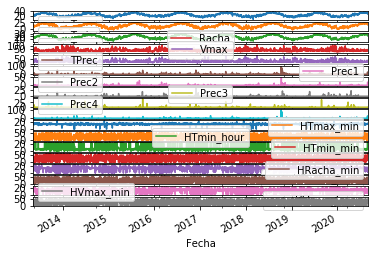

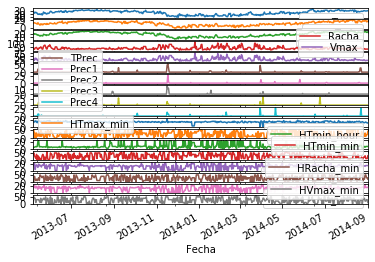

In [11]:
plot_features = data_pre[plot_cols]
plot_features.index = data_pre.index
_ = plot_features.plot(subplots=True)

plot_features = data_pre[plot_cols][:480]
plot_features.index = data_pre.index[:480]
_ = plot_features.plot(subplots=True)

#### Train / Validación / Prueba

In [12]:
scale = StandardScaler()
df_std = pd.DataFrame(scale.fit_transform(data_pre), 
                      columns = data_pre.columns,
                     index = data_pre.index)

In [13]:
column_indices = {name: i for i, name in enumerate(df_std.columns)}

n = len(df_std)
train_df = df_std[0:int(n*0.7)]
val_df = df_std[int(n*0.7):int(n*0.9)]
test_df = df_std[int(n*0.9):]

num_features = df_std.shape[1]

#### Normalizacion

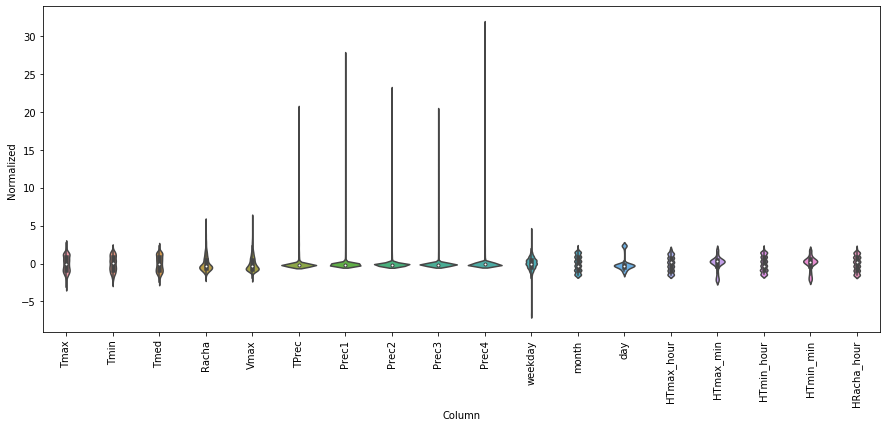

In [14]:
df_std1 = df_std[plot_cols].melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(15, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std1)
_ = ax.set_xticklabels(df.keys(), rotation=90)

### WindowGenerator

In [15]:
class WindowGenerator():
    """https://www.tensorflow.org/tutorials/structured_data/time_series"""
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None, sequence_stride=1,
               shuffle=True, batch_size=32):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        self.sequence_stride = sequence_stride
        self.shuffle = shuffle
        self.batch_size = batch_size

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels    

    def plot(self, model=None, plot_col='Tmed', max_subplots=3):
        
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index], 
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)

            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=self.sequence_stride,
            shuffle=self.shuffle,
            batch_size=self.batch_size,)

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [16]:
w1 = WindowGenerator(input_width=15, label_width=1, shift=1,
                     label_columns=['Tmed'])
w1

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [15]
Label column name(s): ['Tmed']

In [17]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])


example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 16, 25)
Inputs shape: (3, 15, 25)
labels shape: (3, 1, 1)


### Plot

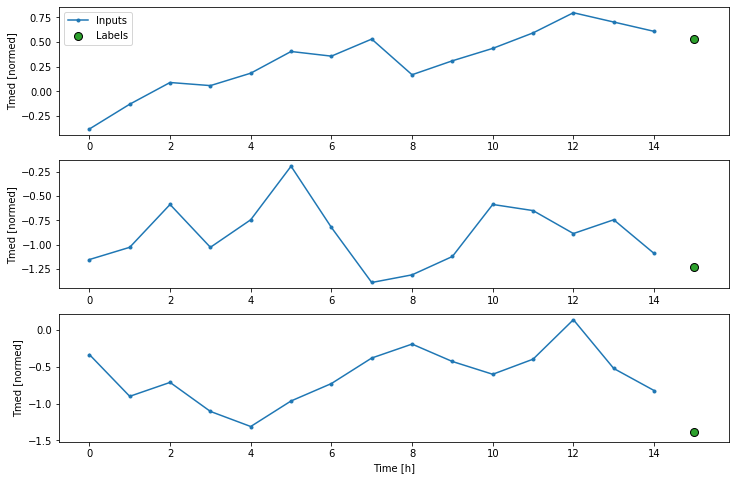

In [18]:
w1.plot()

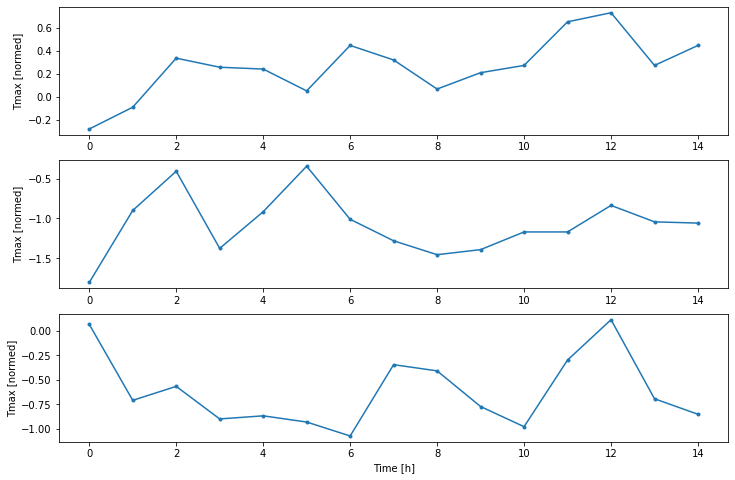

In [19]:
w1.plot((example_inputs, example_labels), plot_col = "Tmax")

### Create tf.data.Dataset

La Dataset.element_specpropiedad le indica la estructura dtypesy las formas de los elementos del conjunto de datos.

In [20]:
w1.train.element_spec

(TensorSpec(shape=(None, 15, 25), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [21]:
for example_inputs, example_labels in w1.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 15, 25)
Labels shape (batch, time, features): (32, 1, 1)


## Generación modelos

### Base

Antes de construir un modelo entrenable, sería bueno tener una línea de base de rendimiento como punto de comparación con los modelos posteriores más complicados.

Esta primera tarea consiste en predecir la temperatura 1h en el futuro dado el valor actual de todas las características. Los valores actuales incluyen la temperatura actual.

Así que comience con un modelo que solo devuelva la temperatura actual como predicción, prediciendo "Sin cambios". Esta es una línea de base razonable ya que la temperatura cambia lentamente. Por supuesto, esta línea de base no funcionará tan bien si realiza una predicción adicional en el futuro.

In [22]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [23]:
single_step_window = WindowGenerator(
                input_width=1, label_width=1, shift=1,
                label_columns=['Tmed'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Tmed']

In [24]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 25)
Labels shape (batch, time, features): (32, 1, 1)


In [25]:
baseline = Baseline(label_index=column_indices['Tmed'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

17/17 [==============================] - 0s 2ms/step - loss: 0.0703 - mean_absolute_error: 0.1983


In [26]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Tmed'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Tmed']

In [27]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', baseline(single_step_window.example[0]).shape)

Input shape: (32, 1, 25)
Output shape: (32, 1, 1)


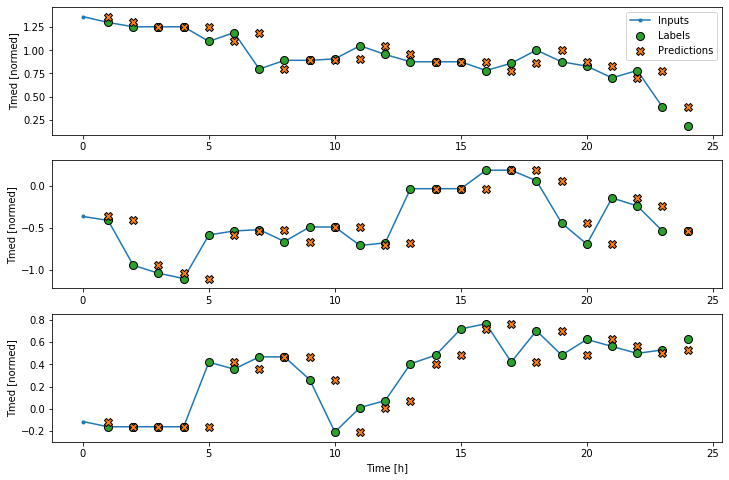

In [28]:
wide_window.plot(baseline)

### Lineal Model

In [29]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [30]:
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Tmed']

In [31]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 25)
Output shape: (32, 1, 1)


In [32]:
MAX_EPOCHS = 200

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [33]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
59/59 [==============================] - 1s 9ms/step - loss: 1.2384 - mean_absolute_error: 0.8730 - val_loss: 1.1150 - val_mean_absolute_error: 0.8199
Epoch 2/200
59/59 [==============================] - ETA: 0s - loss: 0.9382 - mean_absolute_error: 0.757 - 0s 5ms/step - loss: 0.9366 - mean_absolute_error: 0.7568 - val_loss: 0.8502 - val_mean_absolute_error: 0.7168
Epoch 3/200
59/59 [==============================] - 0s 5ms/step - loss: 0.7063 - mean_absolute_error: 0.6556 - val_loss: 0.6464 - val_mean_absolute_error: 0.6262
Epoch 4/200
59/59 [==============================] - 0s 5ms/step - loss: 0.5339 - mean_absolute_error: 0.5681 - val_loss: 0.4940 - val_mean_absolute_error: 0.5485
Epoch 5/200
59/59 [==============================] - 0s 4ms/step - loss: 0.4037 - mean_absolute_error: 0.4927 - val_loss: 0.3768 - val_mean_absolute_error: 0.4781
Epoch 6/200
59/59 [==============================] - 0s 4ms/step - loss: 0.3093 - mean_absolute_error: 0.4306 - val_loss: 0.2911 - 

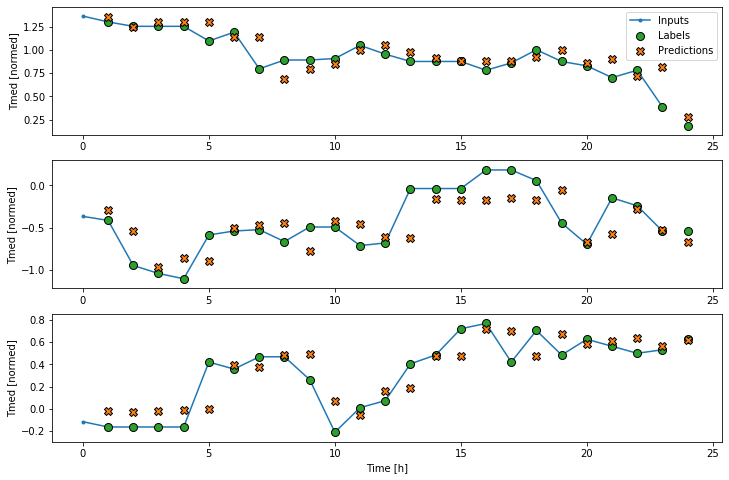

In [34]:
wide_window.plot(linear)

Una ventaja de los modelos lineales es que son relativamente simples de interpretar. Puede extraer los pesos de la capa y ver el peso asignado a cada entrada:

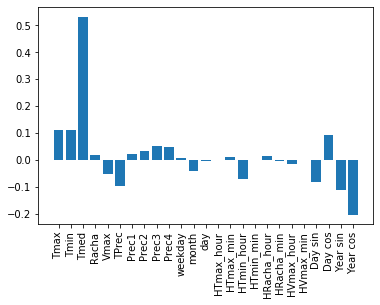

In [35]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### Dense

In [36]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
59/59 [==============================] - 0s 7ms/step - loss: 0.3235 - mean_absolute_error: 0.4223 - val_loss: 0.1319 - val_mean_absolute_error: 0.2839
Epoch 2/200
59/59 [==============================] - 0s 4ms/step - loss: 0.0936 - mean_absolute_error: 0.2391 - val_loss: 0.0930 - val_mean_absolute_error: 0.2287
Epoch 3/200
59/59 [==============================] - 0s 4ms/step - loss: 0.0772 - mean_absolute_error: 0.2146 - val_loss: 0.0876 - val_mean_absolute_error: 0.2214
Epoch 4/200
59/59 [==============================] - 0s 4ms/step - loss: 0.0698 - mean_absolute_error: 0.2019 - val_loss: 0.0815 - val_mean_absolute_error: 0.2134
Epoch 5/200
59/59 [==============================] - 0s 4ms/step - loss: 0.0642 - mean_absolute_error: 0.1937 - val_loss: 0.0801 - val_mean_absolute_error: 0.2087
Epoch 6/200
59/59 [==============================] - 0s 4ms/step - loss: 0.0609 - mean_absolute_error: 0.1886 - val_loss: 0.0758 - val_mean_absolute_error: 0.2066
Epoch 7/200
59/59 [===

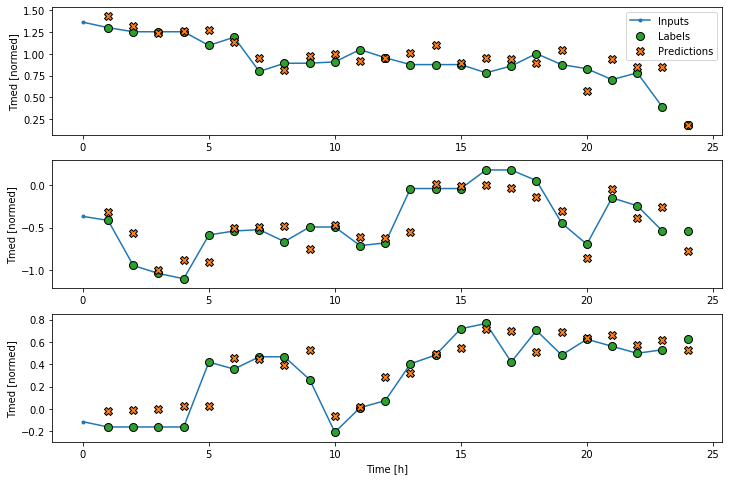

In [37]:
wide_window.plot(dense)

## Series Temporales

In [38]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Tmed'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Tmed']

Text(0.5, 1.0, 'Given 3days as input, predict 1day into the future.')

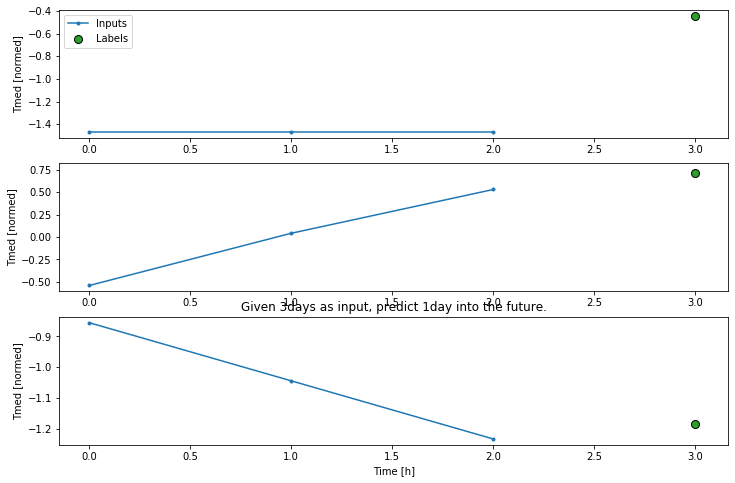

In [39]:
conv_window.plot()
plt.title("Given 3days as input, predict 1day into the future.")

### Dense

In [40]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [41]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 25)
Output shape: (32, 1, 1)


In [42]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

17/17 [==============================] - 0s 2ms/step - loss: 0.0829 - mean_absolute_error: 0.2187


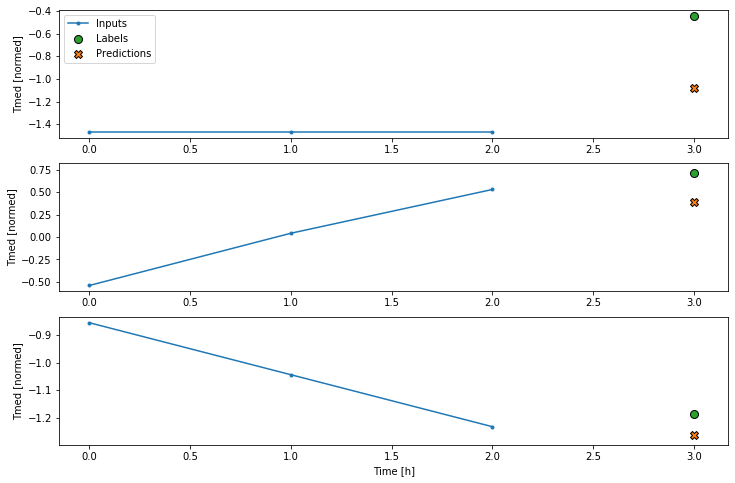

In [43]:
conv_window.plot(multi_step_dense)

In [44]:
print('Input shape:', wide_window.example[0].shape)
try:
    print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 25)

InvalidArgumentError:Matrix size-incompatible: In[0]: [32,600], In[1]: [75,32] [Op:MatMul]


### Convolucionales

In [45]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [46]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 25)
Output shape: (32, 1, 1)


In [47]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

17/17 [==============================] - 0s 2ms/step - loss: 0.1039 - mean_absolute_error: 0.2360


In [48]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 25)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [49]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Tmed'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['Tmed']

In [50]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 25)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


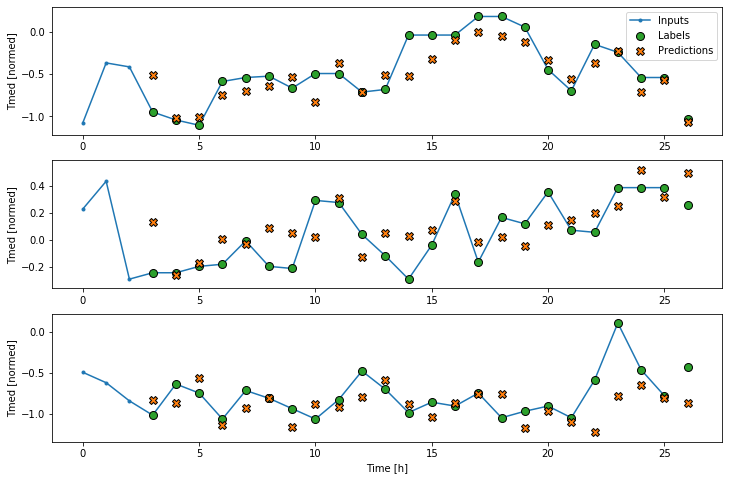

In [51]:
wide_conv_window.plot(conv_model)

### RNN

In [52]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [53]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 25)
Output shape: (32, 24, 1)


In [54]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

16/16 [==============================] - 0s 4ms/step - loss: 0.0785 - mean_absolute_error: 0.2120


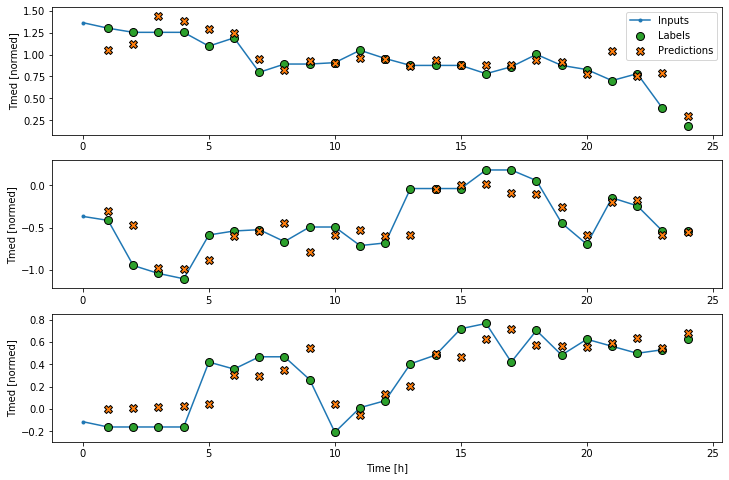

In [55]:
wide_window.plot(lstm_model)

## Resumen

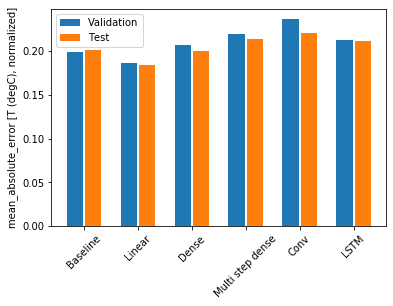

In [56]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [57]:
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.2007
Linear      : 0.1841
Dense       : 0.2001
Multi step dense: 0.2136
Conv        : 0.2199
LSTM        : 0.2111


## Modelo Residual

In [58]:
class ResidualWrapper(tf.keras.Model):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def call(self, inputs, *args, **kwargs):
        delta = self.model(inputs, *args, **kwargs)

        # The prediction for each timestep is the input
        # from the previous time step plus the delta
        # calculated by the model.
        return inputs + delta

In [59]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

16/16 [==============================] - 0s 5ms/step - loss: 0.2409 - mean_absolute_error: 0.2774

Wall time: 47.6 s


## Modelos de varios pasos

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

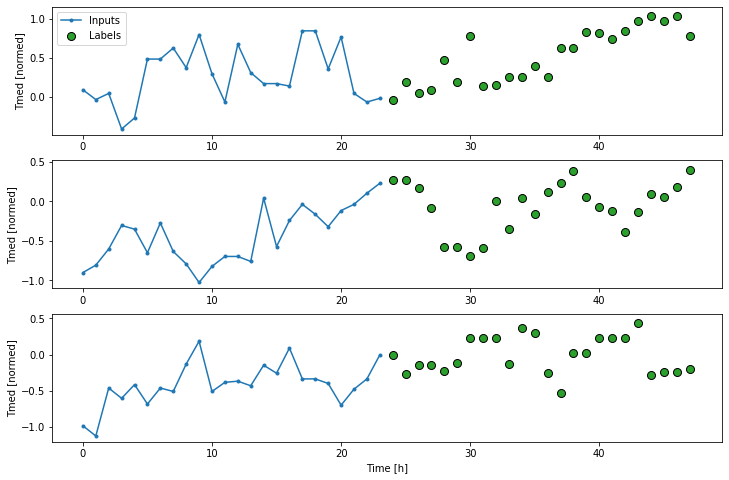

In [60]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

### Líneas base

16/16 [==============================] - 0s 2ms/step - loss: 1.7875 - mean_absolute_error: 0.6622


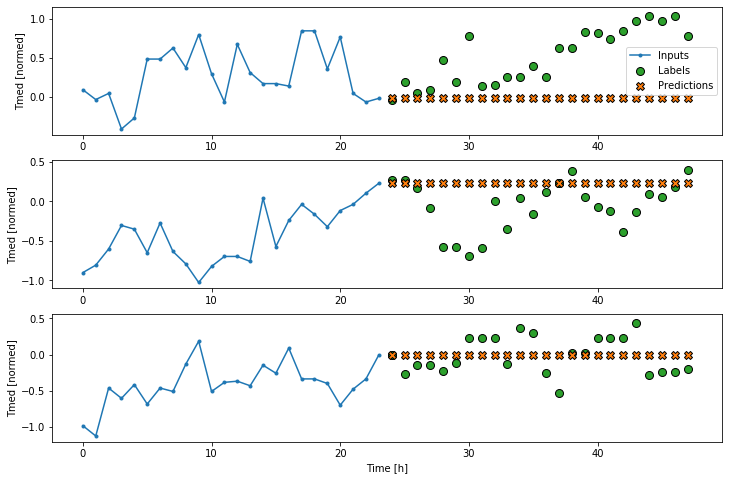

In [61]:
class MultiStepLastBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

### Repeat Baseline

16/16 [==============================] - 0s 1ms/step - loss: 1.8978 - mean_absolute_error: 0.7216


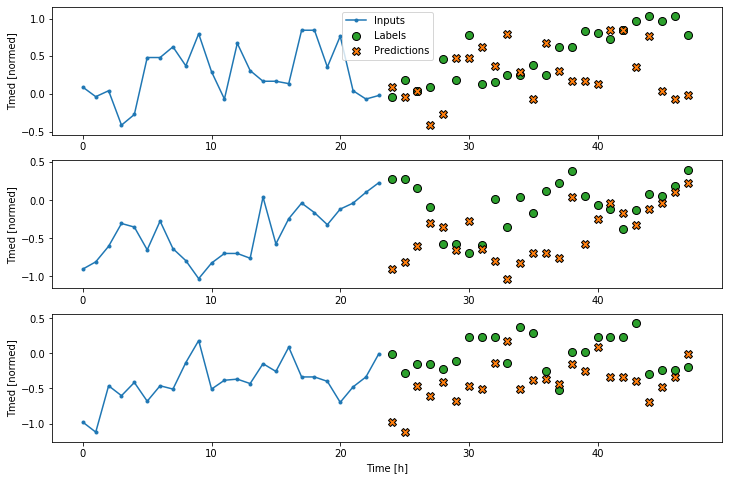

In [62]:
class RepeatBaseline(tf.keras.Model):
    def call(self, inputs):
        return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### Single-shot models

Un enfoque de alto nivel para este problema es utilizar un modelo de "disparo único", donde el modelo hace la predicción de la secuencia completa en un solo paso.

Esto se puede implementar de manera eficiente como layers.Densecon OUT_STEPS*featuresunidades de salida. El modelo solo necesita remodelar esa salida a la requerida (OUTPUT_STEPS, features).

#### Lineal

Un modelo lineal simple basado en el último paso de tiempo de entrada funciona mejor que cualquier línea de base, pero no tiene suficiente potencia. El modelo necesita predecir OUTPUT_STEPSpasos de tiempo, a partir de un paso de tiempo de entrada única con una proyección lineal. Solo puede capturar un segmento de baja dimensión del comportamiento, probablemente basado principalmente en la hora del día y la época del año.

16/16 [==============================] - 0s 2ms/step - loss: 0.9043 - mean_absolute_error: 0.4987


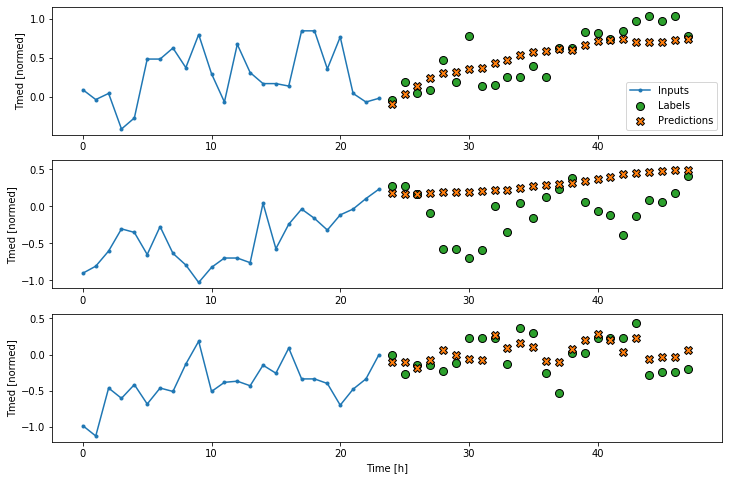

In [63]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### Denso

Agregar un layers.Denseentre la entrada y la salida le da al modelo lineal más potencia, pero aún se basa en un solo paso de tiempo de entrada.

16/16 [==============================] - 0s 3ms/step - loss: 0.8785 - mean_absolute_error: 0.4822


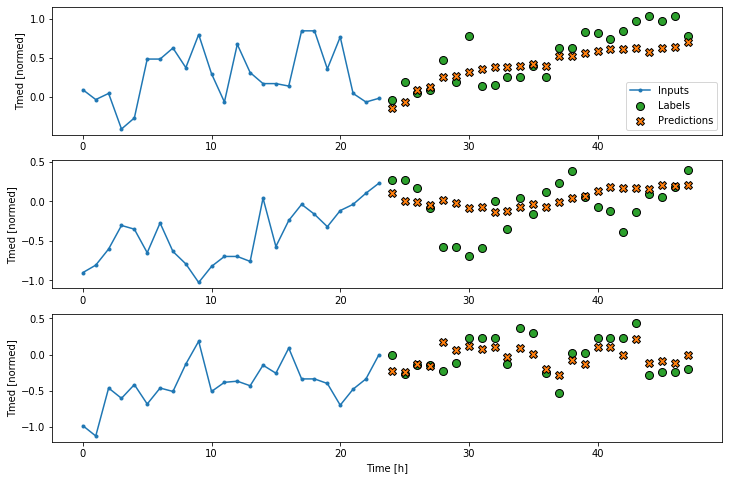

In [64]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

#### CNN

Un modelo convolucional hace predicciones basadas en un historial de ancho fijo, lo que puede conducir a un mejor rendimiento que el modelo denso, ya que puede ver cómo cambian las cosas con el tiempo:

16/16 [==============================] - 0s 2ms/step - loss: 0.8826 - mean_absolute_error: 0.4843


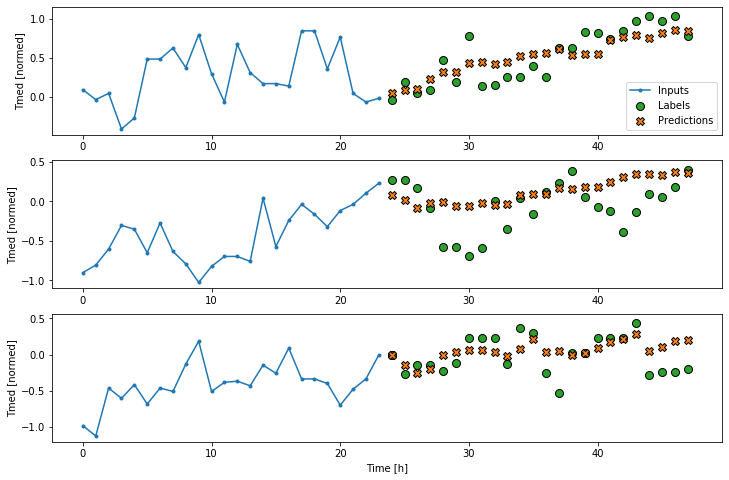

In [65]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#### RNN

Un modelo recurrente puede aprender a utilizar un largo historial de entradas, si es relevante para las predicciones que hace el modelo. Aquí, el modelo acumulará el estado interno durante 24 horas, antes de realizar una única predicción durante las próximas 24 horas.

En este formato de disparo único, el LSTM solo necesita producir una salida en el último paso de tiempo, así que configúrelo return_sequences=False.

16/16 [==============================] - 0s 5ms/step - loss: 0.8604 - mean_absolute_error: 0.4666


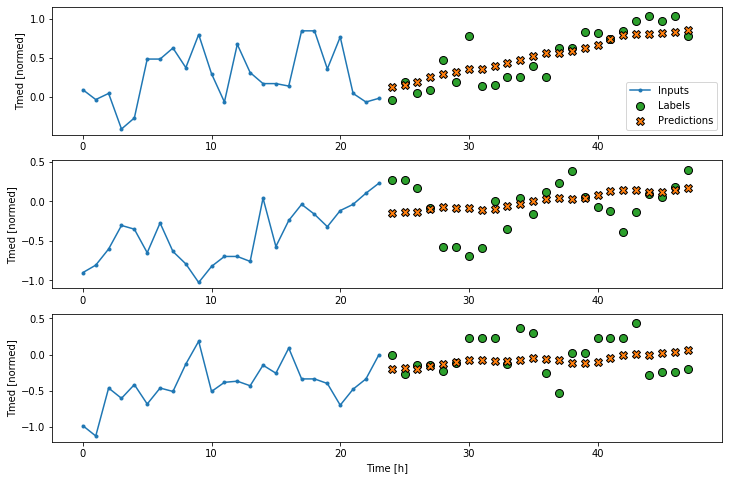

In [66]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

#### Avanzado: modelo autorregresivo

Todos los modelos anteriores predicen la secuencia de salida completa en un solo paso.

En algunos casos, puede ser útil que el modelo descomponga esta predicción en pasos de tiempo individuales. Luego, la salida de cada modelo se puede retroalimentar en cada paso y se pueden hacer predicciones condicionadas al anterior, como en el clásico Generar secuencias con redes neuronales recurrentes .

Una clara ventaja de este estilo de modelo es que se puede configurar para producir resultados con una longitud variable.

Puede tomar cualquiera de los modelos de salida múltiple de un solo paso entrenados en la primera mitad de este tutorial y ejecutarlo en un ciclo de retroalimentación autorregresivo, pero aquí nos centraremos en construir un modelo que haya sido entrenado explícitamente para hacer eso.

**RNN**

Este tutorial solo crea un modelo RNN autorregresivo, pero este patrón se puede aplicar a cualquier modelo que se haya diseñado para generar un solo paso de tiempo.

El modelo tendrá la misma forma básica que los LSTMmodelos de un solo paso : una LSTMseguida de una layers.Denseque convierte las LSTMsalidas en predicciones del modelo.

A layers.LSTMestá layers.LSTMCellenvuelto en el nivel superior layers.RNNque administra el estado y los resultados de la secuencia por usted (consulte los RNN de Keras para obtener más detalles).

En este caso, el modelo tiene que administrar manualmente las entradas para cada paso, por lo que se utiliza layers.LSTMCelldirectamente para el nivel inferior, la interfaz de un solo paso de tiempo.

In [67]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)

In [68]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [69]:
def warmup(self, inputs):
    # inputs.shape => (batch, time, features)
    # x.shape => (batch, lstm_units)
    x, *state = self.lstm_rnn(inputs)

    # predictions.shape => (batch, features)
    prediction = self.dense(x)
    return prediction, state

FeedBack.warmup = warmup

In [70]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 25])

In [71]:
def call(self, inputs, training=None):
    # Use a TensorArray to capture dynamically unrolled outputs.
    predictions = []
    # Initialize the lstm state
    prediction, state = self.warmup(inputs)

    # Insert the first prediction
    predictions.append(prediction)

    # Run the rest of the prediction steps
    for n in range(1, self.out_steps):
        # Use the last prediction as input.
        x = prediction
        # Execute one lstm step.
        x, state = self.lstm_cell(x, states=state,
                                  training=training)
        # Convert the lstm output to a prediction.
        prediction = self.dense(x)
        # Add the prediction to the output
        predictions.append(prediction)

    # predictions.shape => (time, batch, features)
    predictions = tf.stack(predictions)
    # predictions.shape => (batch, time, features)
    predictions = tf.transpose(predictions, [1, 0, 2])
    return predictions

FeedBack.call = call

In [72]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 25)


16/16 [==============================] - 0s 6ms/step - loss: 0.9002 - mean_absolute_error: 0.4990


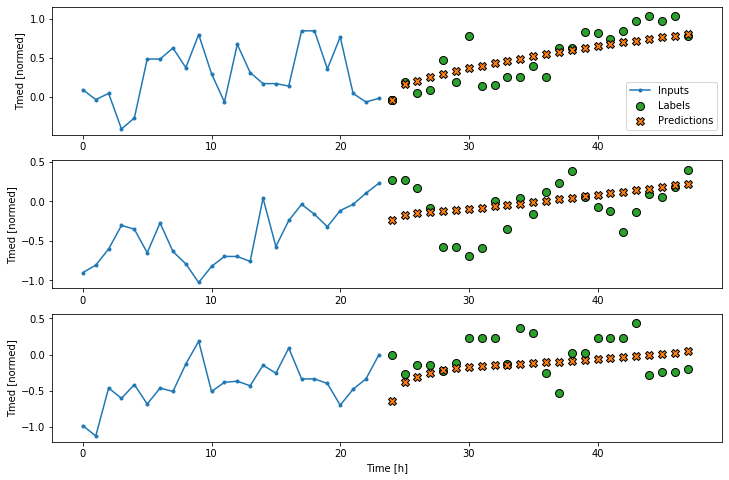

In [73]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### Resumen

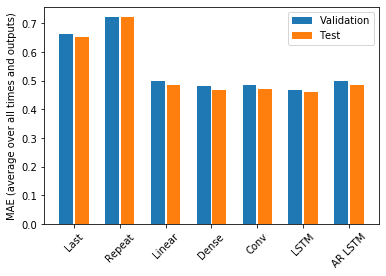

In [74]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()